In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [12]:
image = cv2.imread("data/training/cam0/images/camera_0_img_0.jpg", cv2.IMREAD_GRAYSCALE)
anno = np.load("data/training/cam0/annotations/annotations.npz")
anno = anno["points2d"]

(480, 960)
[[0.390625  0.6015625]
 [0.515625  0.5703125]
 [0.46875   0.703125 ]
 [0.625     0.7265625]
 [0.75      0.8359375]
 [0.46875   0.5078125]
 [0.578125  0.5234375]
 [0.390625  0.53125  ]
 [0.671875  0.5859375]
 [0.84375   0.65625  ]
 [0.5       0.4921875]
 [0.609375  0.4765625]
 [0.5       0.421875 ]
 [0.765625  0.34375  ]
 [0.875     0.21875  ]
 [0.359375  0.703125 ]
 [0.359375  0.3515625]
 [0.515625  0.2890625]
 [0.703125  0.2578125]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]]


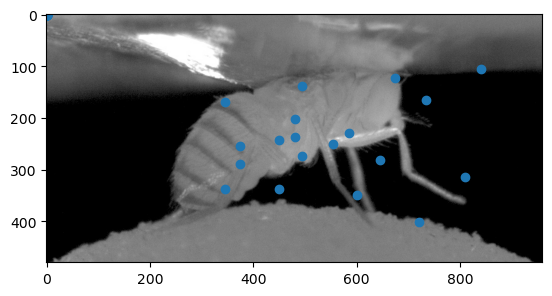

In [26]:
print(image.shape)
print(anno)
H, W = image.shape
plt.imshow(image, cmap="grey")
plt.scatter(anno[:,0]*W, anno[:,1]*H)
plt.show(block=True)